## Visualise wavelet filter

Just want to create a simple notebook to plot a wavelet for a given set of parameters. The wavelets are generated in `scattering2d/filter_bank.py`, which is called by the various interfaces in `frontend` which provide functions to perform the convolutions with an input field easily.

Here let's just plot the filters, where another notebook can look at showing the convolved fields.

In [1]:
from kymatio.numpy import Scattering2D
from kymatio.scattering2d.filter_bank import morlet_2d
from kymatio.scattering2d.utils import fft2
import numpy as np
import matplotlib.pyplot as plt

from numpy import pi
import pylab as plt
from colorsys import hls_to_rgb

In [2]:
## Function to plot complex arrays using imshow
## https://stackoverflow.com/questions/17044052/matplotlib-imshow-complex-2d-array
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + pi)  / (2 * pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c

In [3]:
test_filter=morlet_2d(M=128,N=128,sigma=3,theta=1,xi=0.5,slant=0.5)

In [4]:
test_filter

array([[ 5.9715593e-03+3.2938798e-11j,  4.9795890e-03+3.4580815e-03j,
         2.5400606e-03+5.5424380e-03j, ...,
        -1.2527721e-04-5.7008723e-03j,  2.5400606e-03-5.5424380e-03j,
         4.9795890e-03-3.4580815e-03j],
       [ 5.5055399e-03+2.2990971e-03j,  3.5424992e-03+5.0610043e-03j,
         7.9593877e-04+6.0182307e-03j, ...,
         1.4520427e-03-5.4677567e-03j,  4.0352945e-03-4.2244066e-03j,
         5.6891032e-03-1.2852649e-03j],
       [ 4.2456966e-03+4.0982608e-03j,  1.7540045e-03+5.7976213e-03j,
        -7.8712369e-04+5.6532822e-03j, ...,
         2.8822278e-03-4.4720257e-03j,  4.9126260e-03-2.3118774e-03j,
         5.4989271e-03+9.8161609e-04j],
       ...,
       [ 2.5494630e-03-5.0679059e-03j,  4.5046685e-03-2.8506841e-03j,
         4.9807462e-03+2.2888328e-04j, ...,
        -2.7115527e-03-2.9504122e-03j, -1.9002953e-03-4.6686819e-03j,
         5.0596776e-05-5.6361374e-03j],
       [ 4.2456966e-03-4.0982608e-03j,  5.4989271e-03-9.8161609e-04j,
         4.9126260e-03

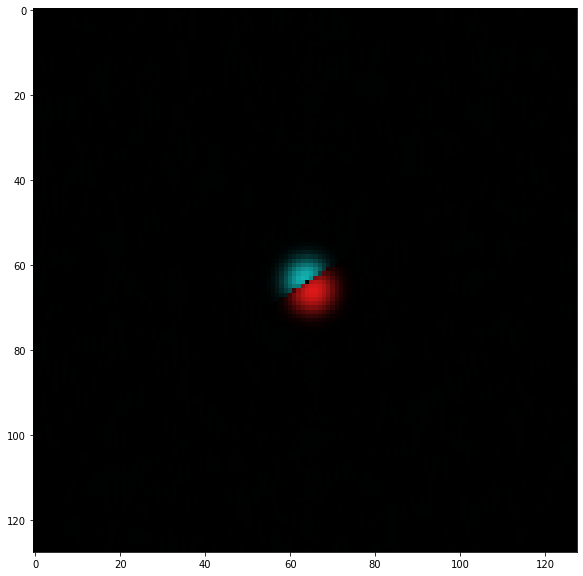

In [5]:
test_filter=morlet_2d(M=128,N=128,sigma=12,theta=1,xi=0.1,slant=1.0)
filter_c = fft2(test_filter)
filter_c = np.fft.fftshift(filter_c)
plt.figure(figsize=(10,10))
plt.imshow(colorize(filter_c))

In [6]:
test_filter.real

array([[0.00056728, 0.00056142, 0.00054406, ..., 0.00051587, 0.00054406,
        0.00056142],
       [0.00056371, 0.00055289, 0.00053078, ..., 0.00052698, 0.00055043,
        0.00056286],
       [0.0005531 , 0.00053751, 0.00051095, ..., 0.00053125, 0.00054979,
        0.00055721],
       ...,
       [0.00053578, 0.00054468, 0.00054222, ..., 0.00044497, 0.00048511,
        0.00051572],
       [0.0005531 , 0.00055721, 0.00054979, ..., 0.00047433, 0.00051095,
        0.00053751],
       [0.00056371, 0.00056286, 0.00055043, ..., 0.00049818, 0.00053078,
        0.00055289]], dtype=float32)

In [7]:
scattering = Scattering2D(J=2, shape=(32, 32))

In [ ]:
test_array=np.ones((32,32))-0.9

In [ ]:
scattered=scattering(test_array)

In [ ]:
np.shape(scattered[0])

In [ ]:
plt.imshow(scattered[0])
plt.colorbar()

In [ ]:
scattered[0]